In [1]:
#Importing Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import imageio

In [2]:
#Data Preprocessing

# Calling the requisite Directory
data_dir = 'Brain Tumor Data Set\Brain Tumor Data Set'
types = os.listdir(data_dir) # list of the sub folders ['Brain Tumor', 'Healthy']

#Coverting the filepaths and labels into into a dataframe 
file_paths = []
labels = []

for folder in types:
    sub_fold_path = os.path.join(data_dir, folder)  #creates exact location of folder
    sub_fold = os.listdir(sub_fold_path)     #lists the path
    for pic in sub_fold:
        pic_path = os.path.join(sub_fold_path, pic)   #invoking path of each image
        file_paths.append(pic_path)      #adding paths of images to filepaths
        labels.append(folder)           #label is simply thge folder name

f_series = pd.Series(file_paths, name = 'file_paths')    #converting file_paths into column of pandas dataframe
l_series = pd.Series(labels, name = 'labels')           #converting labels into column of pandas dataframe
df = pd.concat([f_series, l_series], axis =1)           #joining columns into one dataframe

In [3]:
df

,file_paths,labels
0,Brain Tumor Data Set\Brain Tumor Data Set\Brai...,Brain Tumor
1,Brain Tumor Data Set\Brain Tumor Data Set\Brai...,Brain Tumor
2,Brain Tumor Data Set\Brain Tumor Data Set\Brai...,Brain Tumor
3,Brain Tumor Data Set\Brain Tumor Data Set\Brai...,Brain Tumor
4,Brain Tumor Data Set\Brain Tumor Data Set\Brai...,Brain Tumor
...,...,...
4595,Brain Tumor Data Set\Brain Tumor Data Set\Heal...,Healthy
4596,Brain Tumor Data Set\Brain Tumor Data Set\Heal...,Healthy
4597,Brain Tumor Data Set\Brain Tumor Data Set\Heal...,Healthy
4598,Brain Tumor Data Set\Brain Tumor Data Set\Heal...,Healthy


In [4]:
# Splitting data into training testing and validation sets
train_df, ts_df = train_test_split(df, test_size=0.2, random_state = 10, stratify=df['labels']) #stratify avoids biased sampling
valid_df, test_df = train_test_split(ts_df, test_size=0.5, random_state = 10, stratify=ts_df['labels'])

In [5]:
print(f'Training Dataframe\n {train_df}\n\n')
print(f'Validation Dataframe\n {valid_df}\n\n')
print(f'Testing Dataframe\n {test_df}')

Training Dataframe
                                              file_paths       labels
1064  Brain Tumor Data Set\Brain Tumor Data Set\Brai...  Brain Tumor
3318  Brain Tumor Data Set\Brain Tumor Data Set\Heal...      Healthy
3619  Brain Tumor Data Set\Brain Tumor Data Set\Heal...      Healthy
807   Brain Tumor Data Set\Brain Tumor Data Set\Brai...  Brain Tumor
1093  Brain Tumor Data Set\Brain Tumor Data Set\Brai...  Brain Tumor
...                                                 ...          ...
3244  Brain Tumor Data Set\Brain Tumor Data Set\Heal...      Healthy
1625  Brain Tumor Data Set\Brain Tumor Data Set\Brai...  Brain Tumor
1370  Brain Tumor Data Set\Brain Tumor Data Set\Brai...  Brain Tumor
2558  Brain Tumor Data Set\Brain Tumor Data Set\Heal...      Healthy
2849  Brain Tumor Data Set\Brain Tumor Data Set\Heal...      Healthy

[3680 rows x 2 columns]


Validation Dataframe
                                              file_paths       labels
1229  Brain Tumor Data Set\Brain T

In [6]:
#Converting the dataframe into a list of images
batch_size = 32
img_size = (192,192)

gen = ImageDataGenerator(rescale=1.0/255)   #Creating an instance of ImageDataGenerator Class and normalizing

train_gen = gen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size= img_size, 
                                   class_mode= 'binary', color_mode='rgb', shuffle = True,
                                   batch_size= batch_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='file_paths', y_col='labels',target_size= img_size, 
                                   class_mode= 'binary', color_mode='rgb', shuffle = True,
                                   batch_size= batch_size)

test_gen = gen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels',target_size= img_size, 
                                   class_mode= 'binary', color_mode='rgb', shuffle = False,
                                   batch_size= batch_size)

Found 3680 validated image filenames belonging to 2 classes.
Found 460 validated image filenames belonging to 2 classes.
Found 460 validated image filenames belonging to 2 classes.


In [7]:
#Building the model

#Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(192, 192, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(0.002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 190, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 95, 95, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 128)      

In [8]:
history = model.fit(train_gen, validation_data = valid_gen, epochs = 10)

Epoch 1/10


115/115 [==============================] - 70s 595ms/step - loss: 0.5494 - accuracy: 0.7223 - val_loss: 0.4276 - val_accuracy: 0.8543
Epoch 2/10
115/115 [==============================] - 67s 581ms/step - loss: 0.2967 - accuracy: 0.8791 - val_loss: 0.2244 - val_accuracy: 0.9239
Epoch 3/10
115/115 [==============================] - 67s 585ms/step - loss: 0.1644 - accuracy: 0.9418 - val_loss: 0.1752 - val_accuracy: 0.9543
Epoch 4/10
115/115 [==============================] - 67s 578ms/step - loss: 0.0702 - accuracy: 0.9764 - val_loss: 0.2292 - val_accuracy: 0.9609
Epoch 5/10
115/115 [==============================] - 67s 580ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.2503 - val_accuracy: 0.9609
Epoch 6/10
115/115 [==============================] - 67s 578ms/step - loss: 0.0435 - accuracy: 0.9845 - val_loss: 0.2064 - val_accuracy: 0.9587
Epoch 7/10
115/115 [==============================] - 67s 579ms/step - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.2918 - val_

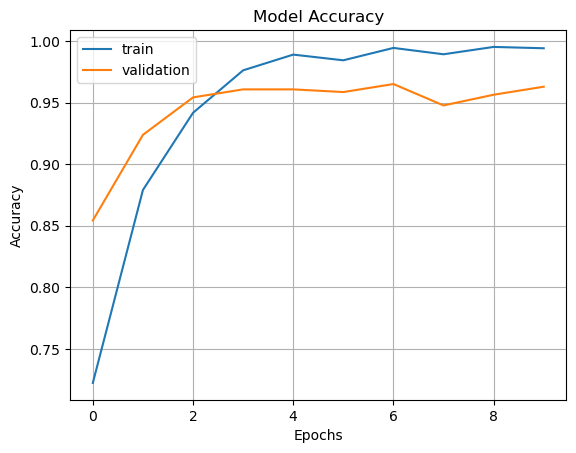

In [9]:
#Printing Accuracy
fig1 =plt.gcf()  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

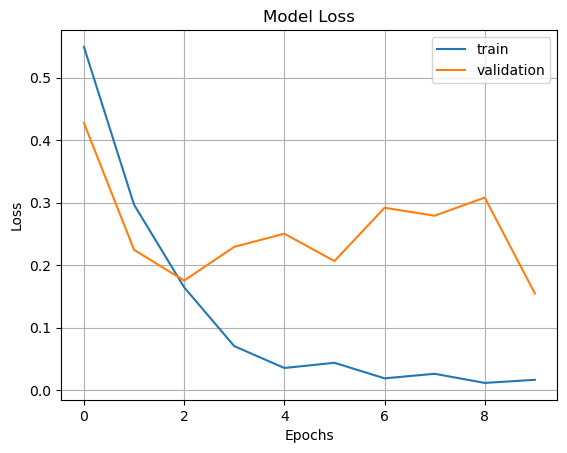

In [10]:
#Printing Loss
fig1 =plt.gcf()  #get current figure
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [11]:
#Evaluating the model
test_evaluation = model.evaluate(test_gen)
print(test_evaluation)

15/15 [==============================] - 3s 181ms/step - loss: 0.0969 - accuracy: 0.9717
[0.0969492569565773, 0.9717391133308411]


In [12]:
#Making Predictions using the model
pred = model.predict(test_gen)
binary_pred = tf.where(tf.constant(pred)>0.5,1,0) # making probabilities into zeroes and 1 using 0.5 threshold
binary_pred[:10] #10 rows

15/15 [==============================] - 3s 173ms/step


<tf.Tensor: shape=(10, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0]])>

In [13]:
#Using one hot encoding to get the original test labels
one_hot_labels = pd.get_dummies(test_df['labels'])
test_labels = one_hot_labels.to_numpy()
test_labels[:10]

array([[False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False]])

In [14]:
# Confusion Matrix of the data
confusion_matrix = tf.math.confusion_matrix(np.argmax(binary_pred, axis =1), np.argmax(test_labels, axis = 1))
confusion_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[243,   5],
       [  8, 204]])>